In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
input_image = cv2.imread(r'..\someshapes.jpg')

In [7]:
gray = cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)

In [28]:
ret,thresh = cv2.threshold(gray,127,255,1)

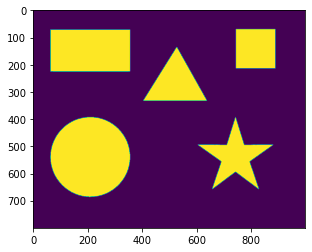

In [29]:
plt.imshow(thresh)

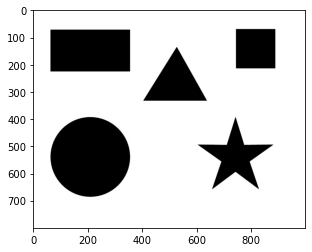

In [8]:
plt.imshow(input_image)

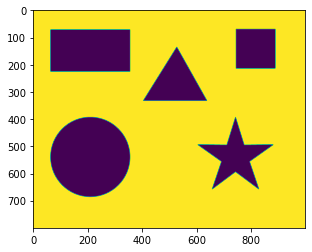

In [9]:
plt.imshow(gray)

In [30]:
## Extract contours
contour,h = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)

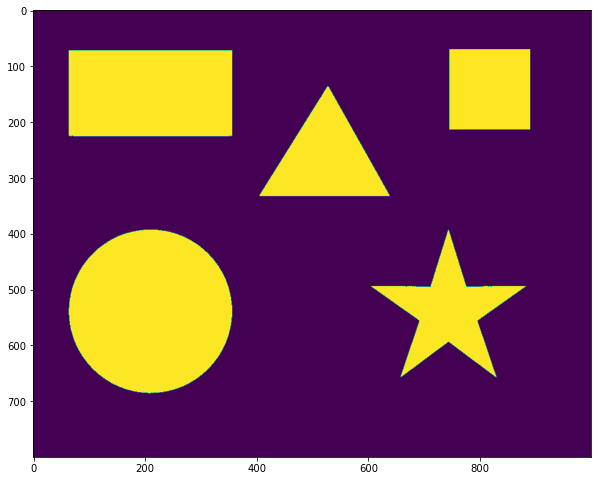

In [32]:
plt.figure(figsize = (10,12))
plt.imshow(thresh)

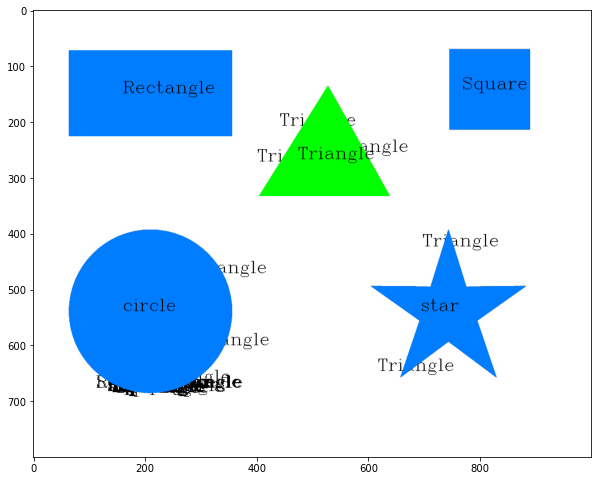

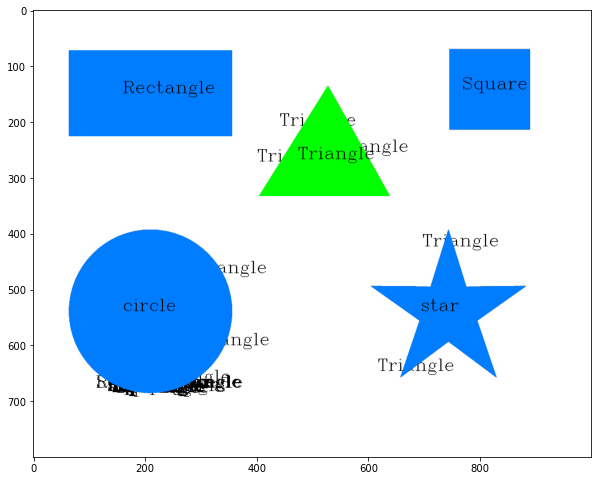

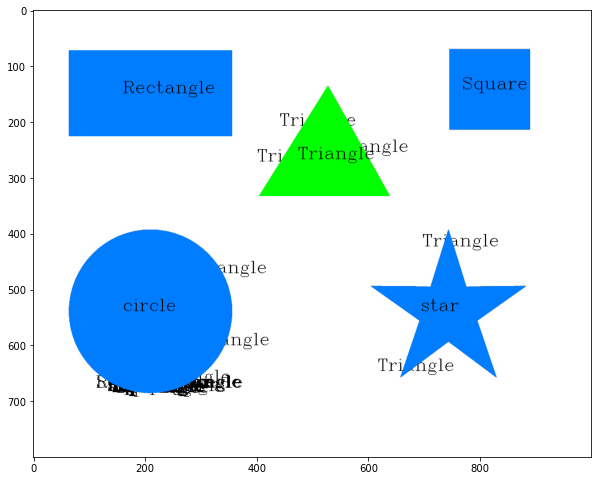

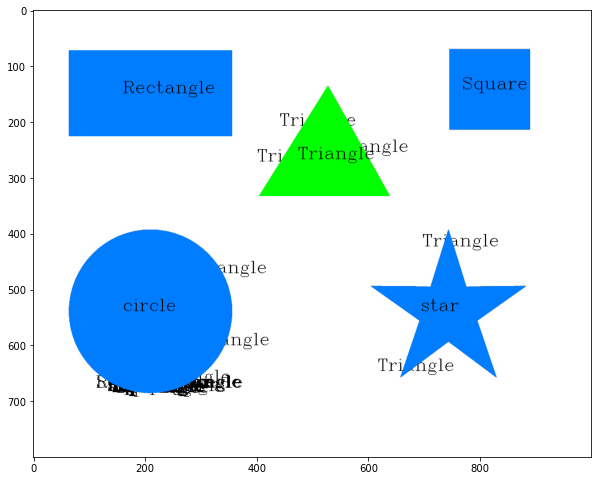

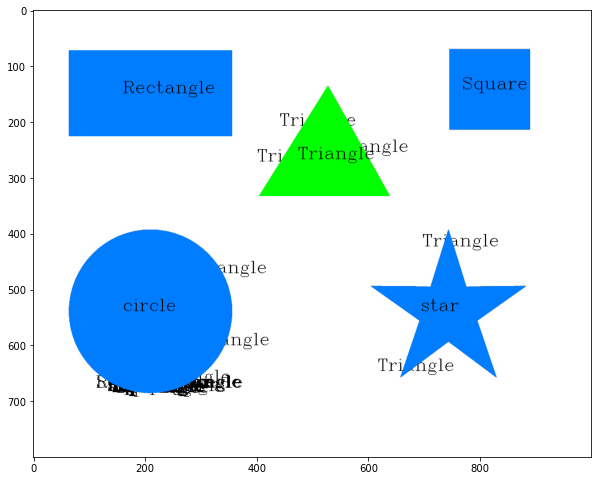

In [36]:
for i in contour:
    ## Approx polygons
    approx = cv2.approxPolyDP(i,0.01*cv2.arcLength(i,True),True)
    
    if len(approx) == 3:
        shape = 'Triangle'
        cv2.drawContours(input_image,[i],0,(0,255,0),-1)
        
        ## Put text
        M = cv2.moments(i)
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        cv2.putText(input_image,shape,(cx-50,cy),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0),1)
        
    elif len(approx) == 4:
        x,y,w,h = cv2.boundingRect(i)
        M = cv2.moments(i)
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        
        if abs(w-h)<=3:
            shape = 'Square'
            cv2.drawContours(input_image,[i],0,(0,125,255),-1)
            cv2.putText(input_image,shape,(cx-50,cy),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0),1)
        else:
            shape = 'Rectangle'
            cv2.drawContours(input_image,[i],0,(0,125,255),-1)
            M = cv2.moments(i)
            cx = int(M['m10']/M['m00'])
            cy = int(M['m01']/M['m00'])
            cv2.putText(input_image,shape,(cx-50,cy),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0),1)
    
    elif len(approx) == 10:
        shape = 'star'
        cv2.drawContours(input_image,[i],0,(0,125,255),-1)
        M = cv2.moments(i)
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        cv2.putText(input_image,shape,(cx-50,cy),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0),1)
    
    elif len(approx) == 15:
        shape = 'circle'
        cv2.drawContours(input_image,[i],0,(0,125,255),-1)
        M = cv2.moments(i)
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        cv2.putText(input_image,shape,(cx-50,cy),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0),1)
    
    plt.figure(figsize = (10,12))
    plt.imshow(input_image)

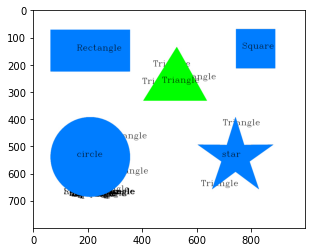